# Final Project
<i> Data Analytics for Decision Making | Master in Computer Science & Business Technology </i> <br>
<i> 10th December, 2023 | 2023-24 Academic Course </i> <br>
<i> IE School of Science & Technology </i>

<b>Group 4 - CUSTOMER CHURN</b>
<i>Describe the characteristics of customers that left the company and those who stay</i>

1. Perform an <b>exploratory data analysis</b> and <b>describe</b> the full <b>dataset</b> and the nature of the variables
2. Describe and justify the <b>data cleaning process</b>
3. Include the <b>resulting graphs:</b> correlation matrices, histograms, line plots, scatterplots, etc. when needed
4. Add a description and <b>distribution</b> of each variable: categorical or quantitative
5. Create a <b>model</b> depending on the dataset and problem type: <br><i>
• Clustering<br>
• Classification <br>• Regression<br>
• Anomaly detection</i>
6. <b>Justify</b> the model, the variables you chose and describe the results
7. Add your <b>conclusions</b> and future additional applications

## Step #1 | Exploratory data analysis & description

### Initial Overview

In [1]:
import pandas as pd

data = pd.read_csv('Group_4_dataset.csv')

data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

#### Data Summary

<i><b>data.info()</i></b> function in pandas used to get a concise summary of the data, by listing the data type of each column in the DataFrame (e.g., integer, float, object, datetime) by its name, as well as showing some other information, such as:

- **Non-Null Counts**: the number of non-null or non-missing values in each column; useful for identifying missing data.

- **Index DataType**: type of the index and the range of the index values.

- **Memory Usage**: amount of memory used; determining how heavy is on system resources.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Findings:
- There are <b>10,000 entries</b> in the DataFrame, with the index ranging from 0 to 9999.
- There are <b>18 columns</b> in total; 18 different <b>variables</b>.
- All columns have <b>10,000 non-null values</b>; no missing values - every column has complete data for all rows.


- **Data Types**:
   - `int64`: <b>12</b> columns with <b>integer</b> dtypes; numeric variables with no decimal points.
   - `float64`: <b>2</b> columns with <b>float</b> dtypes; numeric variables with decimal points.
   - `object`: <b>4</b> columns with <b>object</b> dtypes; strings (text) or mixed types (text + numbers).


- **Memory Usage**: the dataset loaded into a DataFrame type from pandas is using approximately <b>1.4+ MB</b> of memory.

In [4]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

<i>Of course, as we know there are no missing values, the dataset contains completed data, the following function, which returns the count of NaN values for each columns, should return all 0s.</i>

In [5]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#### Descriptive Statistics | Categorical Data
<i><b>data.select_dtypes(include=['object']).describe()</b></i>: function in pandas used to perform two main operations that would allow us to get a quick overview of categorical (textual) data:

1. **Selecting Columns by Data Type**.
   - <i>select_dtypes(include=['object'])</i>: to filter the DataFrame in order to include only those columns that have a specific data type; in this case, the data type defined is 'object', which refers to those that contain text or mixed types.

2. **Descriptive Statistics**.
   - <i>describe()</i>: for 'object' columns it returns the following statistics:
     - **count**: the <b>number</b> of <b>non-null entries</b> in each column.
     - **unique**: the <b>number</b> of <b>unique</b> values in each column.
     - **top**: the <b>most common value</b> in each column.
     - **freq**: the <b>frequency</b> (or count) of the <b>most common value</b> in each column.

In [6]:
data.select_dtypes(include=['object']).describe()

Surname Geography Gender Card Type
count    10000     10000  10000     10000
unique    2932         3      2         4
top      Smith    France   Male   DIAMOND
freq        32      5014   5457      2507

In [7]:
data.select_dtypes(include=['integer']).describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

       NumOfProducts    HasCrCard  IsActiveMember        Exited      Complain  \
count   10000.000000  10000.00000    10000.000000  10000.000000  10000.000000   
mean        1.530200      0.70550        0.515100      0.203800      0.204400   
std         0.581654      0.45584        0.499797      0.402842      0.403283   
min         1.000000      0.00000        0.000000      0.000000      0.000000   
25%         1.000000      0.00000        0.000000      0.000000      0.000000   
50%         1.000000      1.00000        1.000000      0.000000      0.000000   
75%         2.000000      1.00000        1.000000      0.000000      0.000000   
max         4.000000      1.00000        1.000000      1.000000      1.000000   

       Satisfaction Score  Point Earned  
count        10000.000000  10000.000000  
mean             3.013800    606.515100  
std              1.405919    225.924839  
min              1.000000    119.000000  
25%              2.000000    410.000000  
50%              3.000000    605.000000  
75%              4.000000    801.000000  
max              5.000000   1000.000000

Findings:

- There are <b>4</b> categorical columns, as we already knew: <b>Surname</b>, <b>Geography</b>, <b>Gender</b>, and <b>Card Type</b>.
- All categorical columns have <b>10,000</b> entries; indicating <b>no missing values</b>.

- **Unique Values**:
   - `Surname`: <b>2,932</b> unique entries; <b>wide variety</b> of surnames.
   - `Geography`: <b>3</b> unique entries; data pertains to customers from three different countries.
   - `Gender`: <b>2</b> unique entries; male and female.
   - `Card Type`: <b>4</b> unique entries; different types of cards offered by a company, such as credit or debit cards, with varying levels of benefits.

- **Most Common Values (Top)**:
   - `Surname`: <b>"Smith"</b> is the most common value, which occurs 32 times.
   - `Geography`: <b>"France"</b> is the most common value; a plurality of the dataset's subjects are located in France.
   - `Gender`: <b>"Male"</b> is the most common value.
   - `Card Type`: <b>"DIAMOND"</b> is the most common value; perhaps indicating a tier or level of service.

5. **Frequency of Most Common Values**:
   - `Smith` appears 32 times as a surname; 0,32%.
   - `France` appears 5,014 times as a geography category; 50,14%.
   - `Male` appears 5,457 times, indicating there are slightly more male entries than female in the dataset; 54,57%.
   - `DIAMOND` appears 2,507 times as a card type; 25,07%.

## Step #2 and #3 | Cleaning process

### 1. **Removing Redundant or Irrelevant Features**
- `RowNumber`: redundant feature that does not hold any meaningful information for  the analysis or modeling processes.
- `CustomerId`: unique identifier for each customer; as we are gonna perform an analysis about the people in general that left/stayed in the company, there's no need of refering to specific clients. It won't have predictive power in our models.
- `Surname`: unique identifiers as well; no predictive power.

In [8]:
# Removing 'RowNumber', 'CustomerId', and 'Surname' columns
data_cleaned = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Checking the removing process has been performed properly
data_cleaned.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425

### 2. **Handling Missing Values**
- While the initial analysis showed there were no missing values, in practice we should check for that missing values in a more nuanced way; some of them could be **encoded as "NA", "n/a", "none", "unknown"**, or other placeholders.
    - If missing values found by this way, we should then consider and decide whether to fill these in with a statistical value (mean, median, mode), or remove the rows/columns with missing data.

In [9]:
# List of placeholders we're gonna check
placeholders = ["NA", "n/a", "none", "unknown", ""]

# True if any of the predefined placeholders are found in the dataset
placeholders_present = any(data_cleaned.isin(placeholders).any())

print(placeholders_present)

False


### 3. **Data Type Conversion**
- Converting columns to the appropriate type according to their stored values.
#### 1/0 to Booleans

In [10]:
# Check the list of unique values for each integer column
unique_values_int_columns = {column: data_cleaned[column].unique() for column in data_cleaned.select_dtypes(include=['int64']).columns}

unique_values_int_columns

{'CreditScore': array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
        549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
        571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
        465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
        656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
        738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
        493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
        710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
        668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
        579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
        631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
        778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
        689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
        763, 712, 703, 662, 659, 523

As we can appreciate, `HasCrCard`, `IsActiveMember`, and `Exited` (even though this is our target so we won't convert it) columns only present 2 different values: **0 or 1**, what is likely to represent a Boolean; if one condition is fullfiled, or not. Then, we should consider changing those values to **'True/False'**, rather than operate with them as if they were numerical values (not accurate).
- Booleans are more **memory-efficient** than integers and are also more semantically correct for representing binary states.
    - When using boolean values, operations like filtering, logical indexing, and conditional statements become more straightforward and **computationally efficient**; additionally, many machine learning frameworks expect boolean values for binary features. Using booleans can **simplify data preprocessing** steps.

In [11]:
cr_card = data_cleaned['HasCrCard'].value_counts().reset_index()
cr_card.columns = ['HasCrCard', 'Count']
print(cr_card)

   HasCrCard  Count
0          1   7055
1          0   2945


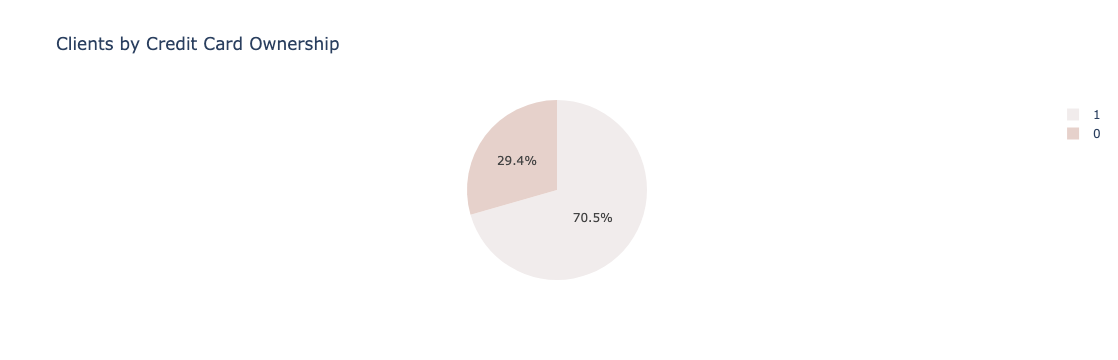

In [35]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

fig = px.pie(cr_card, values='Count', names='HasCrCard', title='Clients by Credit Card Ownership', color_discrete_sequence=px.colors.sequential.amp)
fig.show()

In [44]:
active_member = data_cleaned['IsActiveMember'].value_counts().reset_index()
active_member.columns = ['IsActiveMember', 'Count']
print(active_member)

   IsActiveMember  Count
0               1   5151
1               0   4849


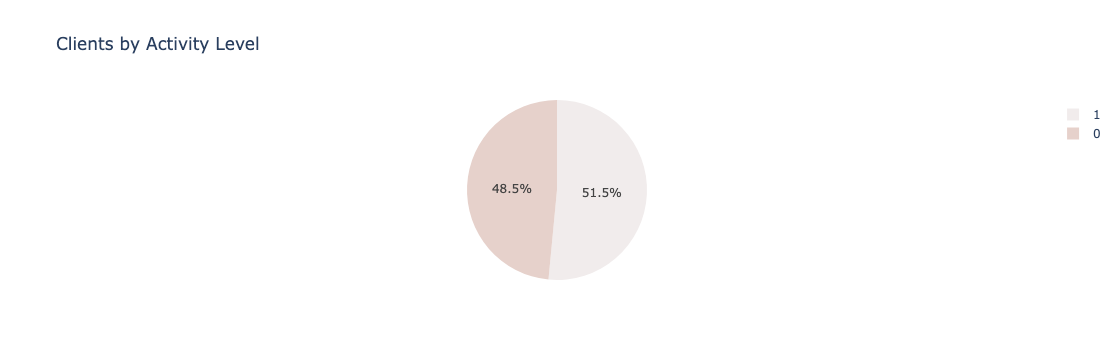

In [46]:
fig = px.pie(active_member, values='Count', names='IsActiveMember', title='Clients by Activity Level', color_discrete_sequence=px.colors.sequential.amp)
fig.show()

In [47]:
# Converting 1/0 integers to boolean values
data_cleaned['HasCrCard'] = data_cleaned['HasCrCard'].map({1: True, 0: False})
data_cleaned['IsActiveMember'] = data_cleaned['IsActiveMember'].map({1: True, 0: False})
#data_cleaned['Exited'] = data_cleaned['Exited'].map({1: True, 0: False})

data_cleaned.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0       True            True        101348.88       1         1   
1      False            True        112542.58       0         1   
2       True           False        113931.57       1         1   
3      False           False         93826.63       0         0   
4       True            True         79084.10       0         0   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425

#### Categorical Variables to Category Type
Columns such as `Geography`, `Gender`, and `Card Type` appear to be categorical; converting them to Pandas' category data type can be **much more memory-efficient**; especially useful if the number of unique categories is small compared to the size of the dataset.

In [48]:
# Check the list of unique values for each object column
unique_values_object_columns = {column: data_cleaned[column].unique() for column in data_cleaned.select_dtypes(include=['object']).columns}

unique_values_object_columns

{'Geography': array(['France', 'Spain', 'Germany'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'Card Type': array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)}

In [49]:
geo = data_cleaned['Geography'].value_counts().reset_index()
geo.columns = ['Countries', 'Count']
print(geo)

  Countries  Count
0    France   5014
1   Germany   2509
2     Spain   2477


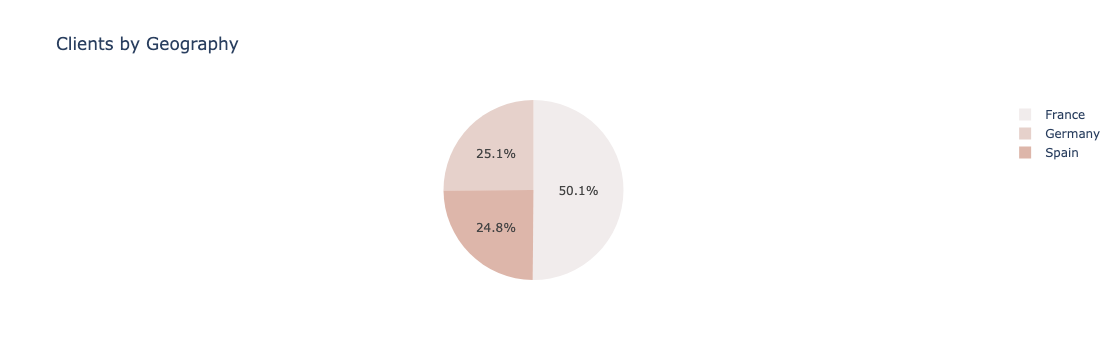

In [51]:
fig = px.pie(geo, values='Count', names='Countries', title='Clients by Geography', color_discrete_sequence=px.colors.sequential.amp)
fig.show()

In [52]:
gender = data_cleaned['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'Count']
print(gender)

   Gender  Count
0    Male   5457
1  Female   4543


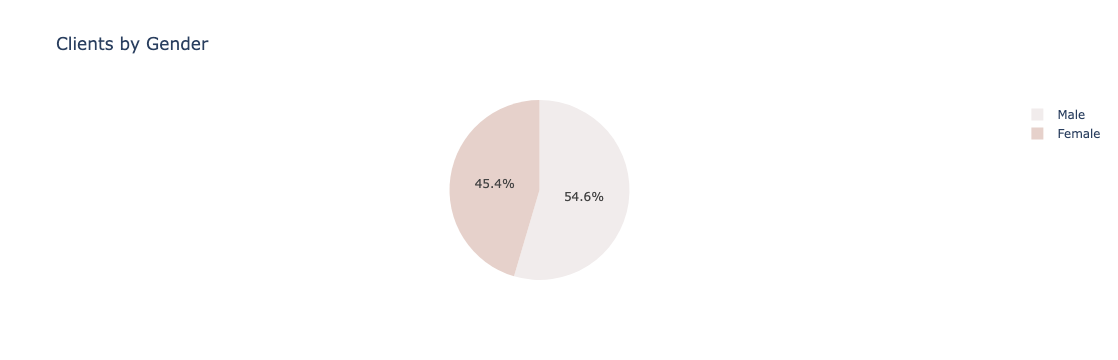

In [54]:
fig = px.pie(gender, values='Count', names='Gender', title='Clients by Gender', color_discrete_sequence=px.colors.sequential.amp)
fig.show()

In [55]:
ages = data_cleaned['Age']
print(ages.describe())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [58]:
#bins = [17.5, 20, 30, 40, 50, 60, 70, 80, 90, 92]
#ages = data_cleaned['Age'].plot(kind='hist', edgecolor = 'black')

#plt.xlabel('Age groups')
#plt.ylabel('Frequency')
#plt.title('Histogram of {}'.format('Age'))

#plt.show()

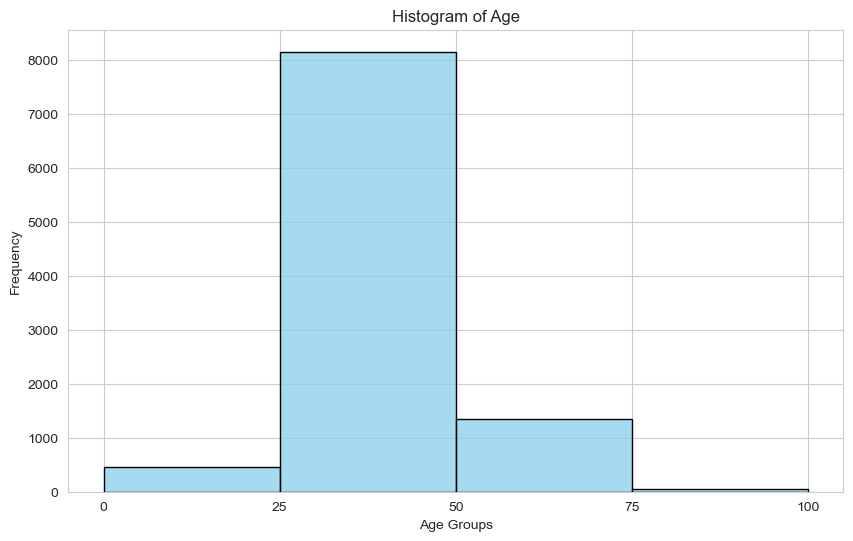

In [59]:
sns.set_style('whitegrid')  
plt.figure(figsize=(10, 6))  

bin_edges = list(range(0, 100 + 5, 25))  # Creating bins every 25 years

sns.histplot(data_cleaned['Age'], bins=bin_edges, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Set xticks to be at the center of each bin
plt.xticks(bin_edges)

plt.show()

In [60]:
card_t = data_cleaned['Card Type'].value_counts().reset_index()
card_t.columns = ['Card Type', 'Count']
print(card_t)

  Card Type  Count
0   DIAMOND   2507
1      GOLD   2502
2    SILVER   2496
3  PLATINUM   2495


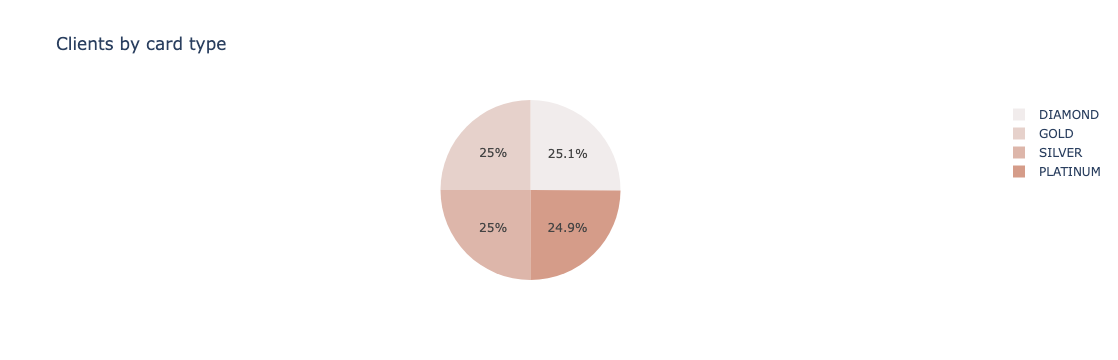

In [62]:
fig = px.pie(card_t, values='Count', names='Card Type', title='Clients by card type', color_discrete_sequence=px.colors.sequential.amp)
fig.show()

In [63]:
# Convert 'Geography', 'Gender', and 'Card Type' to category data type
data_cleaned['Geography'] = data_cleaned['Geography'].astype('category')
data_cleaned['Gender'] = data_cleaned['Gender'].astype('category')
data_cleaned['Card Type'] = data_cleaned['Card Type'].astype('category')

# Display data types to confirm the changes
data_cleaned.dtypes

CreditScore              int64
Geography             category
Gender                category
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                 bool
IsActiveMember            bool
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Card Type             category
Point Earned             int64
dtype: object

#### Convert Integer Columns to Smaller Integers
If some integer columns (int64) have a limited range of values that fit within smaller integer types (like int32 or int16), we can convert them to these smaller types in order to **save memory**.

In [64]:
# Check the range of integer numbers for each integer column
int_column_ranges = {column: (data_cleaned[column].min(), data_cleaned[column].max()) for column in data_cleaned.select_dtypes(include=['int64']).columns}

int_column_ranges

{'CreditScore': (350, 850),
 'Age': (18, 92),
 'Tenure': (0, 10),
 'NumOfProducts': (1, 4),
 'Exited': (0, 1),
 'Complain': (0, 1),
 'Satisfaction Score': (1, 5),
 'Point Earned': (119, 1000)}

<i>`CreditScore`, `Age`, `Tenure`, `NumOfProducts`, `Complain`, and `Satisfaction Score` have ranges that fit comfortably within **int16** (integers from -32768 to 32767).</i><br><i>Noted that, thanks to this, we have also been able to identify `Complain` as a potential **bool column**; it only presents 0/1 values: whether the person to whom each entry corresponds has ever complained or not.</i>

In [65]:
complain_s = data_cleaned['Complain'].value_counts().reset_index()
complain_s.columns = ['Complain', 'Count']
print(complain_s)

   Complain  Count
0         0   7956
1         1   2044


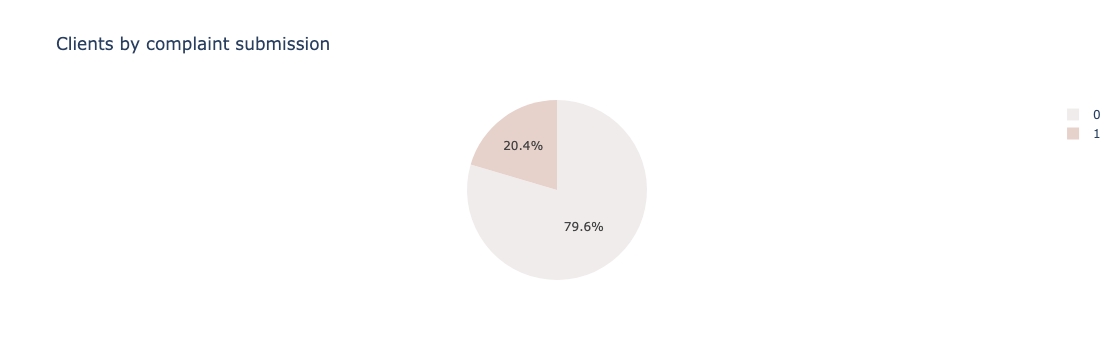

In [67]:
fig = px.pie(complain_s, values='Count', names='Complain', title='Clients by complaint submission', color_discrete_sequence=px.colors.sequential.amp)
fig.show()

In [68]:
satisf_sc = data_cleaned['Satisfaction Score']
print(satisf_sc.describe())

count    10000.000000
mean         3.013800
std          1.405919
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Satisfaction Score, dtype: float64


In [72]:
'''data_cleaned['Satisfaction Score'].plot(kind='hist', edgecolor = 'black')

plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format('Satisfaction Score'))

plt.show()'''

"data_cleaned['Satisfaction Score'].plot(kind='hist', edgecolor = 'black')\n\nplt.xlabel('Satisfaction Score')\nplt.ylabel('Frequency')\nplt.title('Histogram of {}'.format('Satisfaction Score'))\n\nplt.show()"

In [73]:
set(data_cleaned['Satisfaction Score'])

{1, 2, 3, 4, 5}

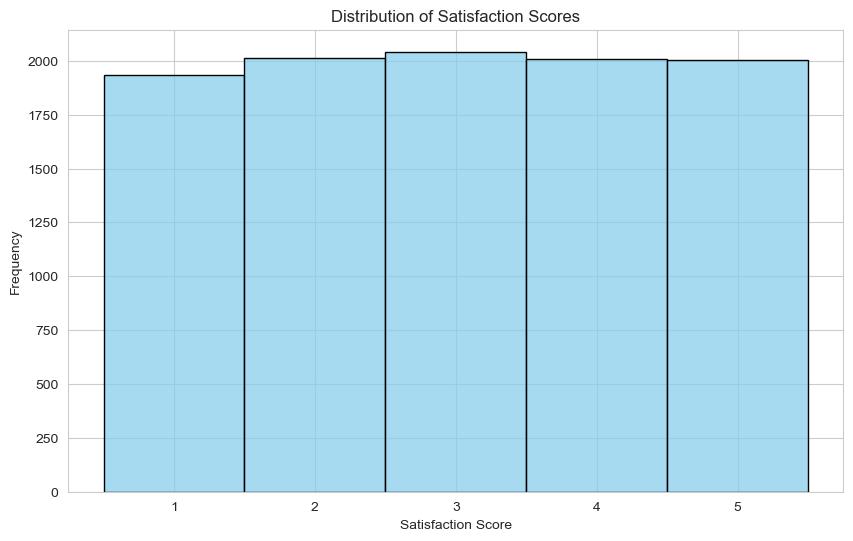

In [74]:
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 6))

# Since we know the unique values are 1 through 5, we set the bins edges to be [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# This centers the bars on the integer values
bins = [0.5 + i for i in range(6)]

sns.histplot(data_cleaned['Satisfaction Score'], bins=bins, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Scores')

# Set xticks to be at the center of each bin
plt.xticks(range(1, 6))

plt.show()

In [75]:
# Converting specified columns to int16
columns_to_convert = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Complain', 'Satisfaction Score']
data_cleaned[columns_to_convert] = data_cleaned[columns_to_convert].astype('int16')

# Converting specified column to bool
data_cleaned['Complain'] = data_cleaned['Complain'].map({1: True, 0: False})

# Displaying data types to confirm the changes
data_cleaned.dtypes

CreditScore              int16
Geography             category
Gender                category
Age                      int16
Tenure                   int16
Balance                float64
NumOfProducts            int16
HasCrCard                 bool
IsActiveMember            bool
EstimatedSalary        float64
Exited                   int64
Complain                  bool
Satisfaction Score       int16
Card Type             category
Point Earned             int64
dtype: object

### 4. **Outlier Detection**
- For numerical variables, identify outliers using statistical methods (like Z-score, IQR) or visualizations (like boxplots). Depending on the context, outliers could be errors, or they could be valid but extreme values. The decision to remove or keep them should be justified by the dataset's context.

In [76]:
data_cleaned.dtypes

CreditScore              int16
Geography             category
Gender                category
Age                      int16
Tenure                   int16
Balance                float64
NumOfProducts            int16
HasCrCard                 bool
IsActiveMember            bool
EstimatedSalary        float64
Exited                   int64
Complain                  bool
Satisfaction Score       int16
Card Type             category
Point Earned             int64
dtype: object

In [77]:
# Identify outliers using boxplots for each numerical variable
numerical_columns = data_cleaned.select_dtypes(include=['int16', 'int64', 'float64']).columns

'''# Plotting boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.show()'''

"# Plotting boxplots for each numerical column\nfor column in numerical_columns:\n    plt.figure(figsize=(10, 4))\n    sns.boxplot(x=data_cleaned[column])\n    plt.title(f'Boxplot of {column}')\n    plt.show()"

In [78]:
len(numerical_columns)

9

In [79]:
print(numerical_columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Exited', 'Satisfaction Score', 'Point Earned'],
      dtype='object')


In [82]:
'''plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned[numerical_columns[0]])
plt.title(f'Boxplot of {numerical_columns[0]}')
plt.show()'''

"plt.figure(figsize=(10, 4))\nsns.boxplot(x=data_cleaned[numerical_columns[0]])\nplt.title(f'Boxplot of {numerical_columns[0]}')\nplt.show()"

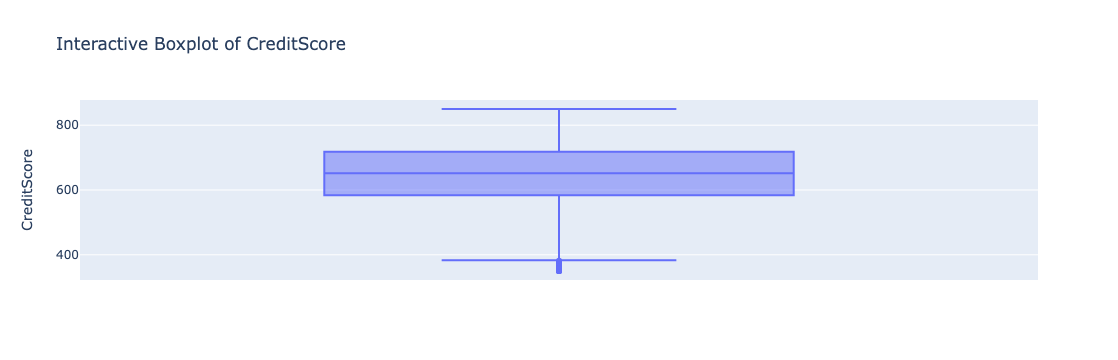

In [83]:
fig = px.box(data_cleaned, y=numerical_columns[0], title=f'Interactive Boxplot of {numerical_columns[0]}')

fig.show()

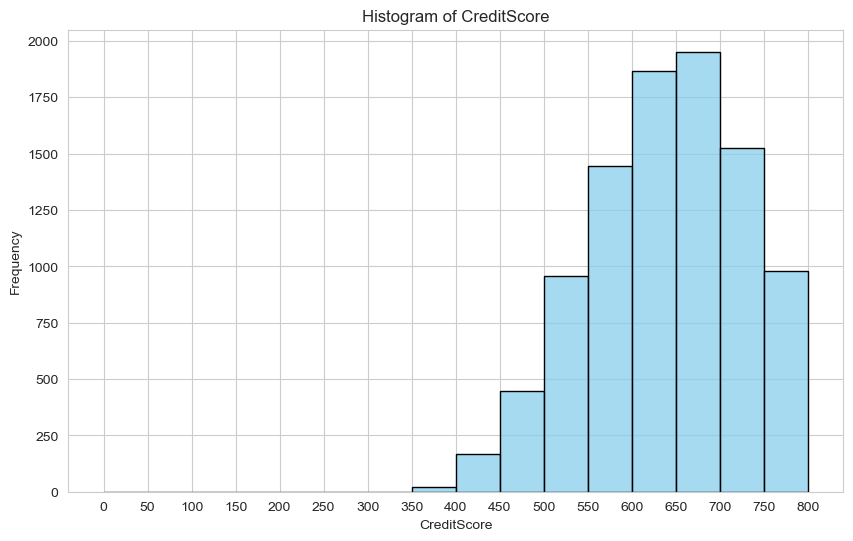

In [88]:
'''df1 = df['CreditScore'].plot(kind='hist' , bins=20, edgecolor = 'black')

plt.xlabel('X-axis Label')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format('Credit Score'))

plt.show()'''

'''
# Plot histogram of CreditScore
plt.figure(figsize=(10, 4))
plt.hist(data_cleaned['CreditScore'], bins=20, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Histogram of CreditScore')
plt.show()'''

sns.set_style('whitegrid')  
plt.figure(figsize=(10, 6))  

bin_edges = list(range(0, int(max(data_cleaned['CreditScore'])), 50)) 

sns.histplot(data_cleaned['CreditScore'], bins=bin_edges, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('Histogram of CreditScore')

# Set xticks to be at the center of each bin
plt.xticks(bin_edges)

plt.show()

In [89]:
#set(data_cleaned['CreditScore'])

**CreditScore**: Shows a fairly normal distribution with a few outliers on the lower end.

This metric can typically refers to a numerical expression representing the creditworthiness of an individual; a key metric widely used by lenders and financial institutions to **assess the risk** of lending money or extending credit to an individual. 
- A **higher** credit score generally indicates **lower risk** to lenders, suggesting that the individual has a history of responsible credit management; conversely, a lower credit score may suggest higher risk, possibly due to past problems such as late payments, defaults, or limited credit history.
 - Credit scores can also affect **credit terms**: interest rates and credit limits; higher scores usually entitle you to better terms.

In [90]:
'''plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned[numerical_columns[1]])
plt.title(f'Boxplot of {numerical_columns[1]}')
plt.show()'''

"plt.figure(figsize=(10, 4))\nsns.boxplot(x=data_cleaned[numerical_columns[1]])\nplt.title(f'Boxplot of {numerical_columns[1]}')\nplt.show()"

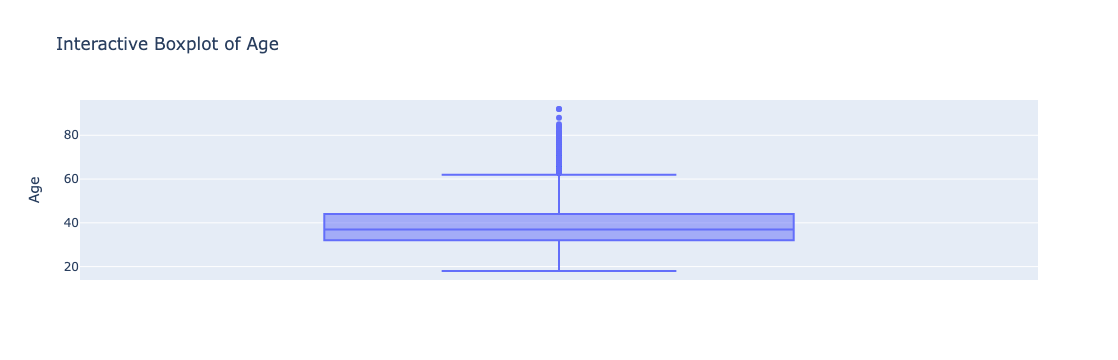

In [91]:
fig = px.box(data_cleaned, y=numerical_columns[1], title=f'Interactive Boxplot of {numerical_columns[1]}')

fig.show()

**Age**: Distribution appears normal with some outliers on the higher end.
- Different age groups often have different interests, needs and habits or behaviors.
 - In financial services, age can be an important factor in assessing risk; younger people may be considered higher risk for certain types of credit due to a shorter credit history.
 - The outliers are representing **older** clients (relative to the rest of the data points); 50% (Q1-Q3) of the sample are between 32 and 44 years old, 25% are between 18-32 years old, and the remaining 25% are between 62-92 years old.
- Unusually high or low age may affect risk analysis and eligibility for certain products or services.

In [92]:
tenure = data_cleaned['Tenure']
print(tenure.describe())

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


In [94]:
'''plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned[numerical_columns[2]])
plt.title(f'Boxplot of {numerical_columns[2]}')
plt.show()'''

"plt.figure(figsize=(10, 4))\nsns.boxplot(x=data_cleaned[numerical_columns[2]])\nplt.title(f'Boxplot of {numerical_columns[2]}')\nplt.show()"

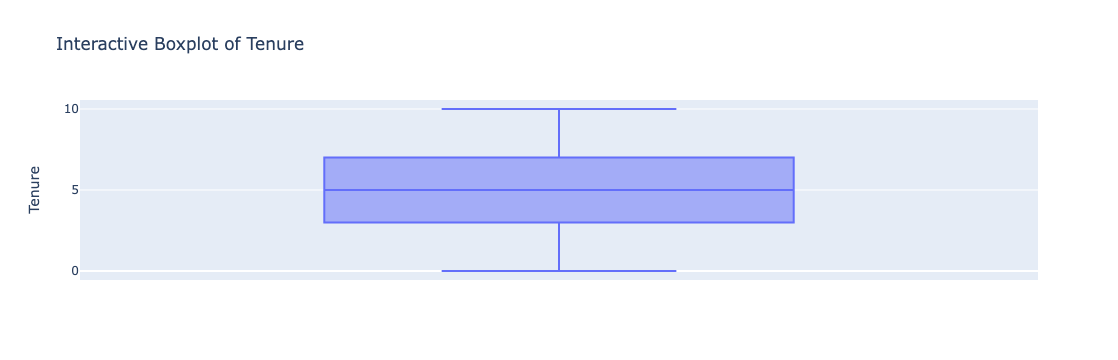

In [95]:
fig = px.box(data_cleaned, y=numerical_columns[2], title=f'Interactive Boxplot of {numerical_columns[2]}')

fig.show()

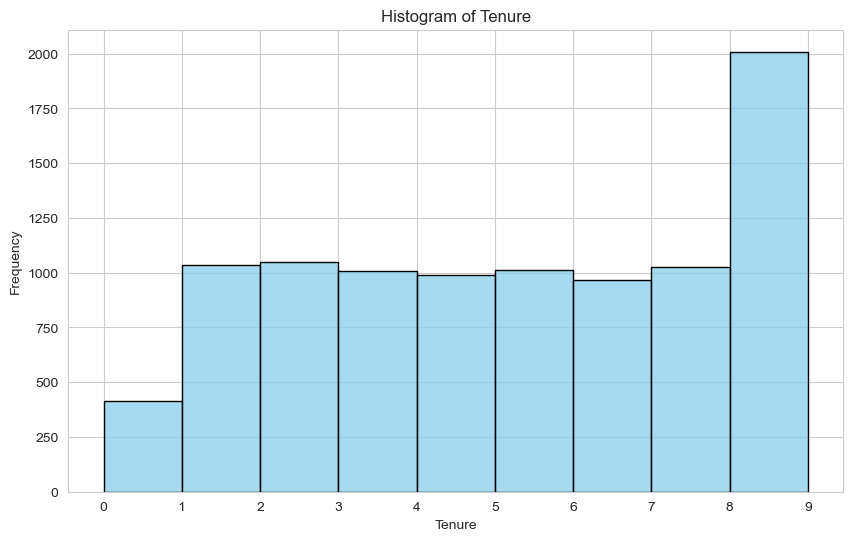

In [96]:
sns.set_style('whitegrid')  
plt.figure(figsize=(10, 6))  

bin_edges = list(range(0, int(max(data_cleaned['Tenure'])))) 

sns.histplot(data_cleaned['Tenure'], bins=bin_edges, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')

# Set xticks to be at the center of each bin
plt.xticks(bin_edges)

plt.show()

**Tenure**: Fairly uniform distribution without notable outliers.<br>
This variable usually indicates the duration or length of time a person has been associated with a service, organization or job; in this case, it could be related to the **length of time** a customer has held an account, credit card or loan, and is then a potential factor in risk assessment, credit scoring and customer value analysis. It can provide information on customer behavior, **loyalty** and preferences, which can be valuable in **predicting customer churn**.

In [97]:
balance = data_cleaned['Balance']
print(balance.describe())

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


In [99]:
'''plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned[numerical_columns[3]])
plt.title(f'Boxplot of {numerical_columns[3]}')
plt.show()'''

"plt.figure(figsize=(10, 4))\nsns.boxplot(x=data_cleaned[numerical_columns[3]])\nplt.title(f'Boxplot of {numerical_columns[3]}')\nplt.show()"

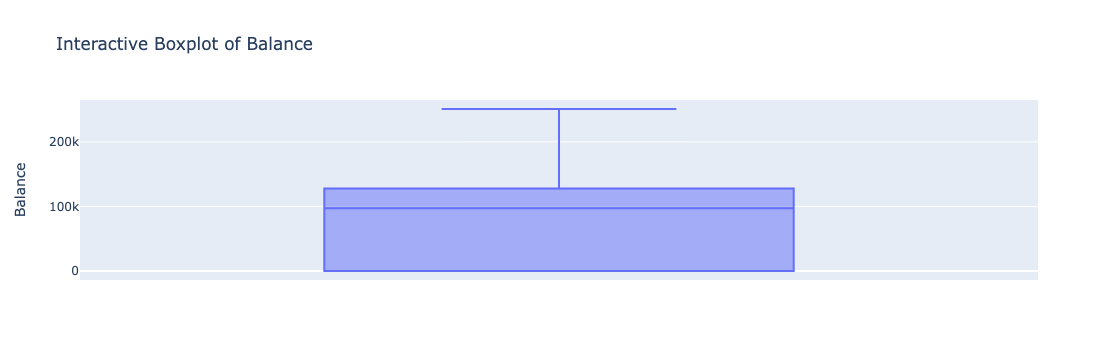

In [100]:
fig = px.box(data_cleaned, y=numerical_columns[3], title=f'Interactive Boxplot of {numerical_columns[3]}')

fig.show()

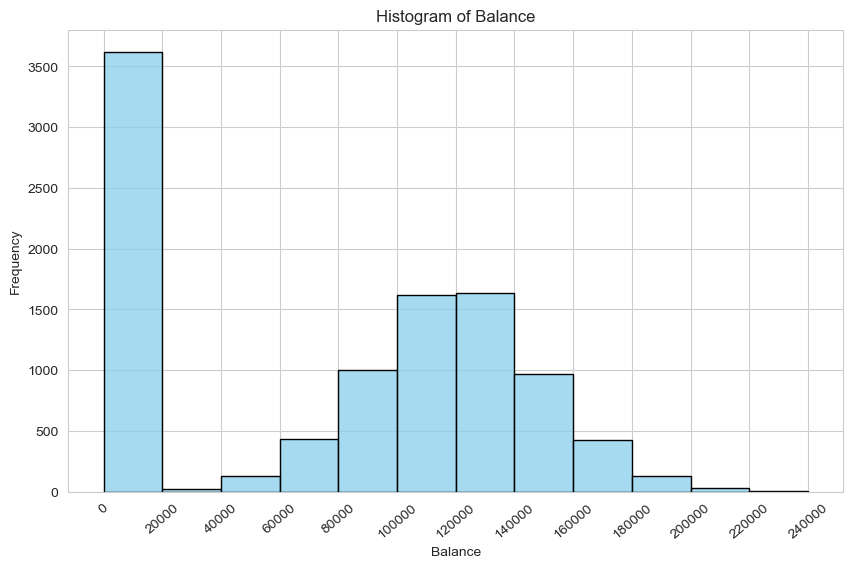

In [101]:
sns.set_style('whitegrid')  
plt.figure(figsize=(10, 6))  

bin_edges = list(range(0, int(max(data_cleaned['Balance'])) + 5, 20000))  # Creating bins every 20000k

sns.histplot(data_cleaned['Balance'], bins=bin_edges, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')

# Set xticks to be at the center of each bin
plt.xticks(bin_edges, rotation=40)

plt.show()

**Balance**: Many values at the lower end (possibly zero balances) and a few outliers on the higher end.

This metric reflects the amount of money a customer has in their account at a given time, It can provide valuable insights into customer behavior and financial health. 
   - A **high balance** might indicate a financially healthy and **active** customer, potentially **more engaged** with the bank's services; while a **low or zero** balance might suggest a dormant account or a customer who is not actively using the bank's services, potentially at a **higher risk of churn**.
   - Consistently low balances over time might suggest the customer is not fully utilizing the bank's services and could switch to another institution.

`Balance` is a **direct indicator** of a customer's engagement and satisfaction with their bank, and it can be a crucial variable in predictive models for customer churn, as it reflects not only the customer's financial health but also their behavior and relationship with the bank.

In [105]:
# Checking there are no repeated customerids, then no insights about each customer's behavior over time

data_check = pd.read_csv('Group_4_dataset.csv')

duplicate_customer_ids = data['CustomerId'].duplicated().sum()
print(f'Number of duplicate CustomerId values: {duplicate_customer_ids}')

Number of duplicate CustomerId values: 0


In [106]:
'''plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned[numerical_columns[4]])
plt.title(f'Boxplot of {numerical_columns[4]}')
plt.show()'''

"plt.figure(figsize=(10, 4))\nsns.boxplot(x=data_cleaned[numerical_columns[4]])\nplt.title(f'Boxplot of {numerical_columns[4]}')\nplt.show()"

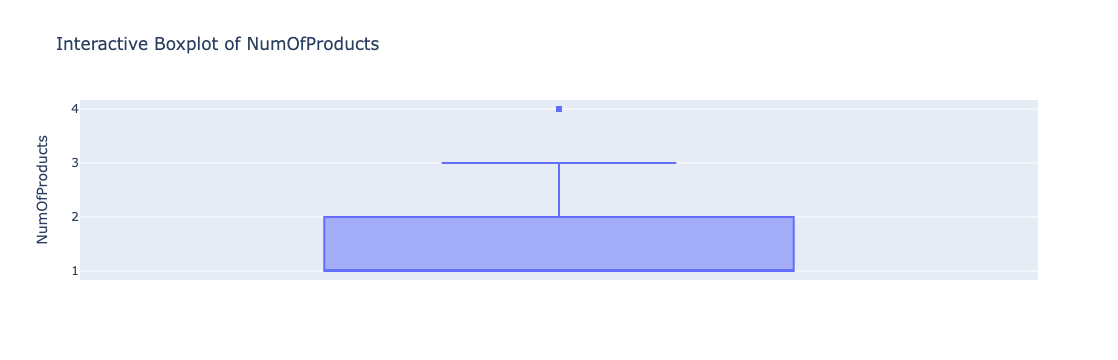

In [107]:
fig = px.box(data_cleaned, y=numerical_columns[4], title=f'Interactive Boxplot of {numerical_columns[4]}')

fig.show()

**NumOfProducts**: Mostly concentrated in lower product numbers with some outliers for higher product numbers.
This variable likely indicates the number of products or services a customer is using from the company; it be quite insightful, especially when analyzing customer behavior and predicting churn:

   - The number of products a customer uses can be a **strong indicator** of their engagement with the company/bank; customers using **multiple products** generally are **more engaged** and possibly more **satisfied** with the bank's offerings.
   - A higher number of products per customer can suggest **successful cross-selling strategies** - it shows the customer's willingness to purchase more than just a basic account or service; while a **lower number** might indicate the customer is not fully utilizing what the bank has to offer - this could be interpreted a sign of a **higher risk** of churn.
   - Customers with multiple products might represent a **lower risk** for churn since their **financial activities** are more **diversified** within the same bank.


In [108]:
print(data_cleaned['EstimatedSalary'].describe())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [110]:
'''plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned[numerical_columns[5]])
plt.title(f'Boxplot of {numerical_columns[5]}')
plt.show()'''

"plt.figure(figsize=(10, 4))\nsns.boxplot(x=data_cleaned[numerical_columns[5]])\nplt.title(f'Boxplot of {numerical_columns[5]}')\nplt.show()"

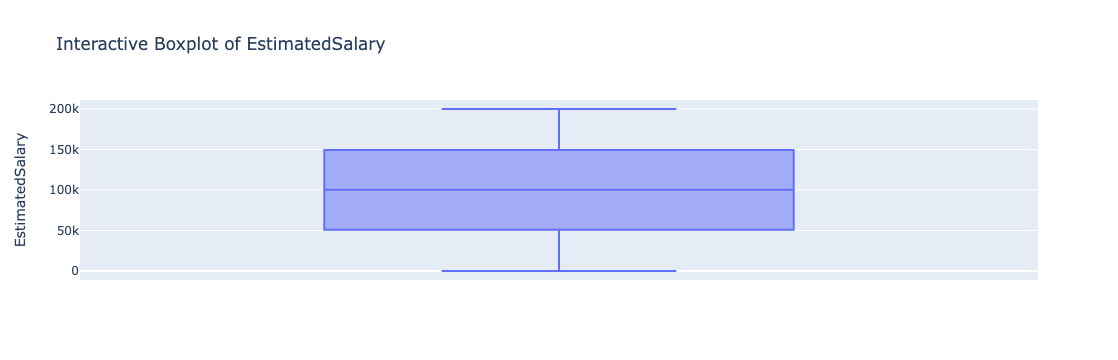

In [111]:
fig = px.box(data_cleaned, y=numerical_columns[5], title=f'Interactive Boxplot of {numerical_columns[5]}')

fig.show()

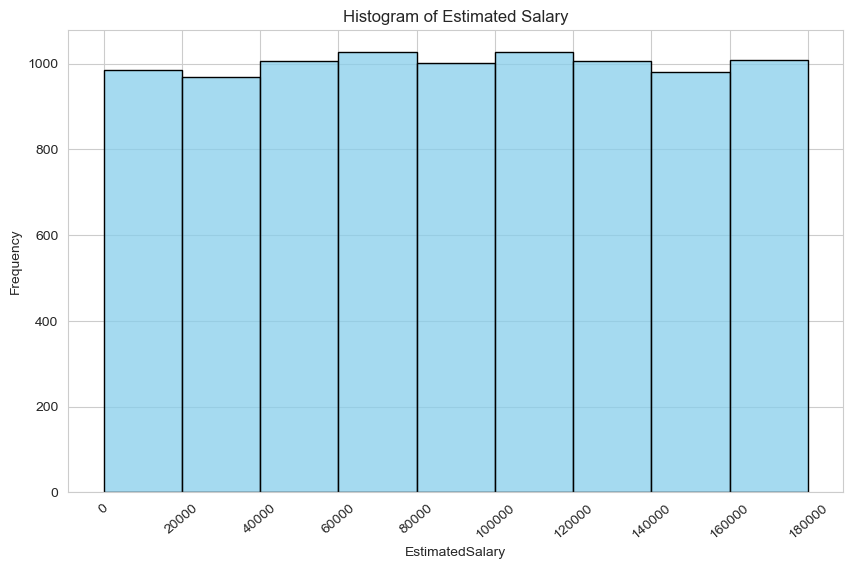

In [112]:
sns.set_style('whitegrid')  
plt.figure(figsize=(10, 6))  

bin_edges = list(range(0, int(max(data_cleaned['EstimatedSalary'])) + 5, 20000))  # Creating bins every 20000k

sns.histplot(data_cleaned['EstimatedSalary'], bins=bin_edges, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Salary')

# Set xticks to be at the center of each bin
plt.xticks(bin_edges, rotation=40)

plt.show()

**EstimatedSalary**: Uniform distribution across the range with no clear outliers.

`EstimatedSalary` likely represents an approximation of a **customer's annual income**; which can be crucial for several reasons:
   - Customers with higher salaries might have **greater financial capacity** to **engage** in more products or services, take larger loans, or maintain higher balances; conversely, they might have limited financial flexibility, affecting their product choices and engagement levels.
   - It can be a key factor in assessing their risk profile for credit products: **higher salaries** may indicate a **lower risk** of default; they might also be more inclined towards **investment opportunities**.
   - Customers with **high salaries** who are **not fully utilizing the bank's services** or products might be at risk of switching to competitors offering higher value or better services; similarly, customers with **lower salaries** might churn if they find **more affordable options** elsewhere or if they perceive that they are not getting sufficient value.

In [113]:
exited_d = data_cleaned['Exited'].value_counts().reset_index()
exited_d.columns = ['Exited', 'Count']
print(exited_d)

   Exited  Count
0       0   7962
1       1   2038


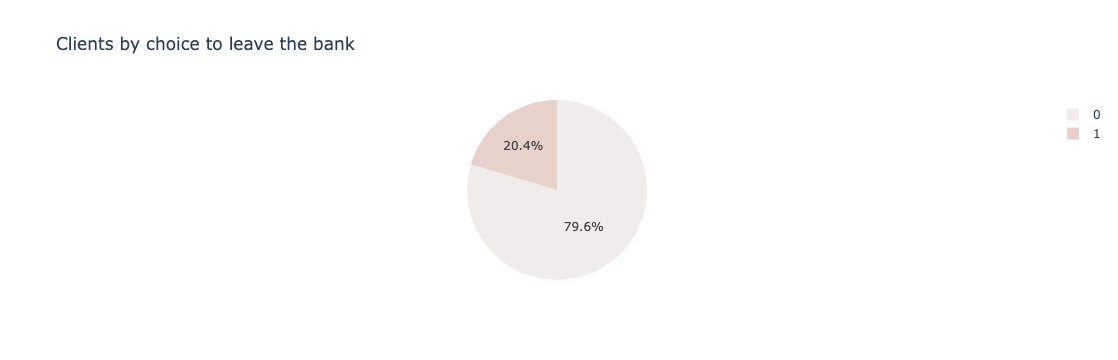

In [115]:
fig = px.pie(exited_d, values='Count', names='Exited', title='Clients by choice to leave the bank', color_discrete_sequence=px.colors.sequential.amp)
fig.show()

In [117]:
'''plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned[numerical_columns[7]])
plt.title(f'Boxplot of {numerical_columns[7]}')
plt.show()'''

"plt.figure(figsize=(10, 4))\nsns.boxplot(x=data_cleaned[numerical_columns[7]])\nplt.title(f'Boxplot of {numerical_columns[7]}')\nplt.show()"

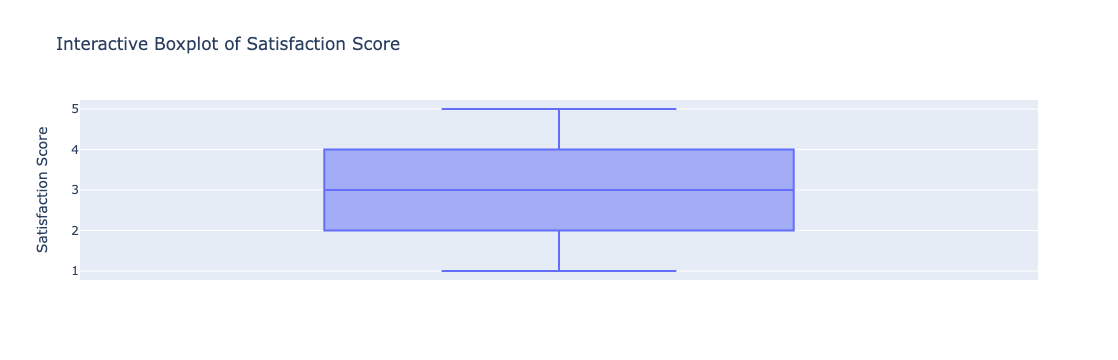

In [120]:
fig = px.box(data_cleaned, y=numerical_columns[7], title=f'Interactive Boxplot of {numerical_columns[7]}')

fig.show()

**Satisfaction Score**: Fairly uniform distribution across its range.

`Satisfaction Score` typically indicates a customer's level of satisfaction with the services or products provided by a company; usually derived from customer feedback, surveys, or other evaluative methods. 

   - Satisfaction scores directly reflect how happy or content customers are with the services or products they receive: higher scores generally imply satisfied customers.
   - Customers with low satisfaction scores are more likely to churn: dissatisfaction is a key driver of customers seeking alternatives and switching to competitors; higher scores, conversely, suggest loyal customers who are less likely to leave.
   - Satisfaction scores can be a significant predictor: patterns in these scores can serve as early warnings for potential churn; proactive measures can be taken to address the concerns of customers with low satisfaction scores.


In [121]:
print(data_cleaned['Point Earned'].describe())

count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: Point Earned, dtype: float64


In [123]:
'''plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned[numerical_columns[8]])
plt.title(f'Boxplot of {numerical_columns[8]}')
plt.show()'''

"plt.figure(figsize=(10, 4))\nsns.boxplot(x=data_cleaned[numerical_columns[8]])\nplt.title(f'Boxplot of {numerical_columns[8]}')\nplt.show()"

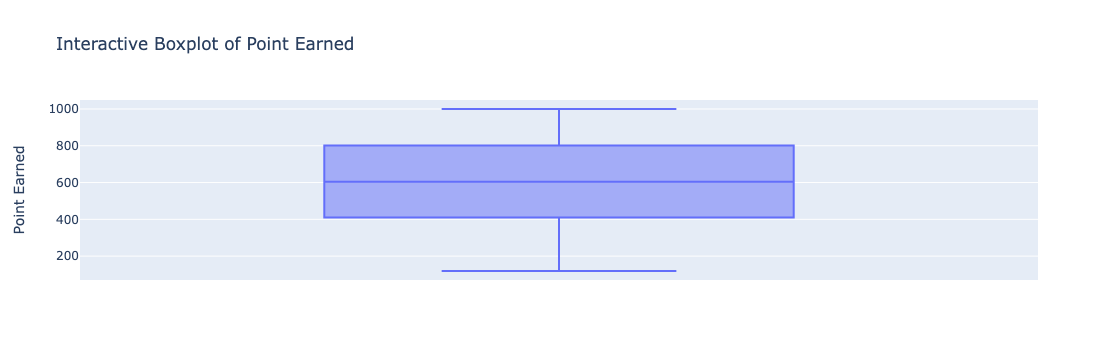

In [124]:
fig = px.box(data_cleaned, y=numerical_columns[8], title=f'Interactive Boxplot of {numerical_columns[8]}')

fig.show()

In [129]:
'''data_cleaned['Point Earned'].plot(kind='hist' , edgecolor = 'black')

plt.xlabel('Point Earned')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format('Point Earned'))

plt.show()'''

"data_cleaned['Point Earned'].plot(kind='hist' , edgecolor = 'black')\n\nplt.xlabel('Point Earned')\nplt.ylabel('Frequency')\nplt.title('Histogram of {}'.format('Point Earned'))\n\nplt.show()"

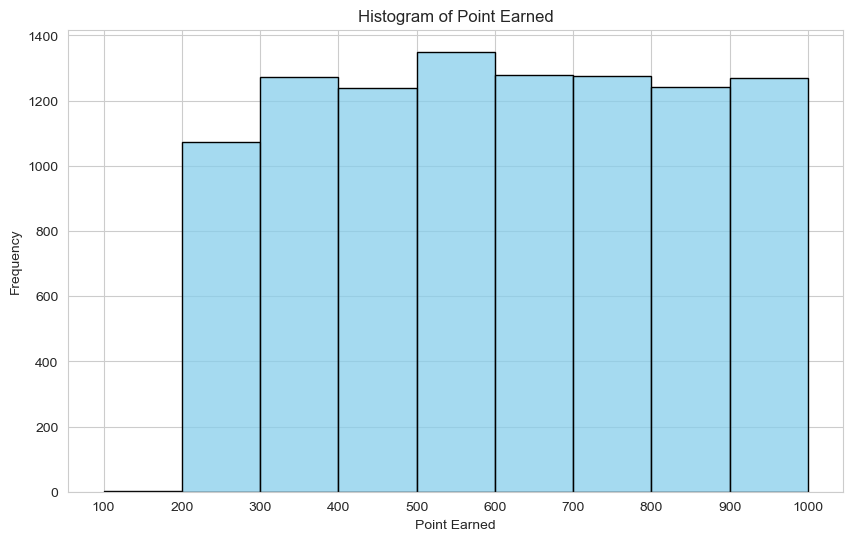

In [130]:
sns.set_style('whitegrid')  
plt.figure(figsize=(10, 6))  

bin_edges = list(range(min(data_cleaned['Point Earned'])-19, max(data_cleaned['Point Earned']) + 5, 100))  # Creating bins every 25 years

sns.histplot(data_cleaned['Point Earned'], bins=bin_edges, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('Point Earned')
plt.ylabel('Frequency')
plt.title('Histogram of Point Earned')

# Set xticks to be at the center of each bin
plt.xticks(bin_edges)

plt.show()

**Point Earned**: Appears normally distributed with some outliers on both ends.

`Point Earned` is a variable likely indicative of a **loyalty or rewards program** where customers accumulate points based on their interactions, purchases, or **engagements** with a company. 

   - Points earned typically reflect the **level of a customer's engagement** with a company's services or products: higher points might indicate more frequent usage or purchases, suggesting a loyal and engaged customer - those who accumulate many points are often more invested in the company, as they might be benefiting from loyalty programs.
   - Reward points are often used as incentives for customers to continue using a company’s services or products: they might be **less likely to churn** if they have a significant number of points, as they would lose these benefits upon leaving; customers with **low or no points** might not be fully utilizing the company’s loyalty programs, possibly due to dissatisfaction or better offers from competitors, making them more **susceptible to churn**.

### 5. Normalization
#### Normalize High-Range Integers:

For columns like CreditScore, Balance, EstimatedSalary, and Point Earned, as they're gonna be used in machine learning models, we should normalize or standardize their values, just in case our algorithms are sensitive to the scale of data.

In [131]:
# Check the range of integer numbers for high-range integer columns
#high_range_int_columns = ['Age', 'Tenure', 'NumOfProducts', 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']
#high_range_int_column_ranges = {column: (data_cleaned[column].min(), data_cleaned[column].max()) for column in high_range_int_columns}

#high_range_int_column_ranges

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_normalize = ['Age', 'Tenure', 'NumOfProducts', 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']

data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

data_cleaned.head()

CreditScore Geography  Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221    France  Female  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036     Spain  Female  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794    France  Female  0.293517  1.032908  1.333053       2.527057   
3     0.501521    France  Female  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884     Spain  Female  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0       True            True         0.021886       1      True   
1      False            True         0.216534       0      True   
2       True           False         0.240687       1      True   
3      False           False        -0.108918       0     False   
4       True            True        -0.365276       0     False   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND     -0.630839  
1                   3   DIAMOND     -0.666251  
2                   3   DIAMOND     -1.015942  
3                   5      GOLD     -1.135457  
4                   5      GOLD     -0.803472

### 6. **Feature Engineering** <br><br> TODO
- Derived variables that can be more informative than the original variables.

### 6. **Encoding Categorical Variables**
- Machine learning models require numerical input, so you'll need to encode categorical variables. This could be done through one-hot encoding, label encoding, or using target-based encoding, depending on the model you plan to use and the nature of the categorical variable.

In [135]:
data_cleaned

CreditScore Geography  Gender       Age    Tenure   Balance  \
0       -0.326221    France  Female  0.293517 -1.041760 -1.225848   
1       -0.440036     Spain  Female  0.198164 -1.387538  0.117350   
2       -1.536794    France  Female  0.293517  1.032908  1.333053   
3        0.501521    France  Female  0.007457 -1.387538 -1.225848   
4        2.063884     Spain  Female  0.388871 -1.041760  0.785728   
...           ...       ...     ...       ...       ...       ...   
9995     1.246488    France    Male  0.007457 -0.004426 -1.225848   
9996    -1.391939    France    Male -0.373958  1.724464 -0.306379   
9997     0.604988    France  Female -0.278604  0.687130 -1.225848   
9998     1.256835   Germany    Male  0.293517 -0.695982 -0.022608   
9999     1.463771    France  Female -1.041433 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0         -0.911583       True            True         0.021886       1   
1         -0.911583      False            True         0.216534       0   
2          2.527057       True           False         0.240687       1   
3          0.807737      False           False        -0.108918       0   
4         -0.911583       True            True        -0.365276       0   
...             ...        ...             ...              ...     ...   
9995       0.807737       True           False        -0.066419       0   
9996      -0.911583       True            True         0.027988       0   
9997      -0.911583      False            True        -1.008643       1   
9998       0.807737       True           False        -0.125231       1   
9999      -0.911583       True           False        -1.076370       0   

      Complain  Satisfaction Score Card Type  Point Earned  
0         True                   2   DIAMOND     -0.630839  
1         True                   3   DIAMOND     -0.666251  
2         True                   3   DIAMOND     -1.015942  
3        False                   5      GOLD     -1.135457  
4        False                   5      GOLD     -0.803472  
...        ...                 ...       ...           ...  
9995     False                   1   DIAMOND     -1.356781  
9996     False                   5  PLATINUM      0.728088  
9997      True                   3    SILVER     -0.188192  
9998      True                   2      GOLD     -1.184148  
9999     False                   3   DIAMOND      1.347794  

[10000 rows x 15 columns]

In [136]:
one_hot_encoded_data = pd.get_dummies(data_cleaned, columns=['Geography', 'Gender', 'Card Type'])

In [137]:
one_hot_encoded_data.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583       True   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583      False   
2    -1.536794  0.293517  1.032908  1.333053       2.527057       True   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737      False   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583       True   

   IsActiveMember  EstimatedSalary  Exited  Complain  ...  Point Earned  \
0            True         0.021886       1      True  ...     -0.630839   
1            True         0.216534       0      True  ...     -0.666251   
2           False         0.240687       1      True  ...     -1.015942   
3           False        -0.108918       0     False  ...     -1.135457   
4            True        -0.365276       0     False  ...     -0.803472   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0              True              False            False           True   
1             False              False             True           True   
2              True              False            False           True   
3              True              False            False           True   
4             False              False             True           True   

   Gender_Male  Card Type_DIAMOND  Card Type_GOLD  Card Type_PLATINUM  \
0        False               True           False               False   
1        False               True           False               False   
2        False               True           False               False   
3        False              False            True               False   
4        False              False            True               False   

   Card Type_SILVER  
0             False  
1             False  
2             False  
3             False  
4             False  

[5 rows x 21 columns]

In [138]:
# Exporting the DataFrame to a CSV file
#one_hot_encoded_data.to_csv('cleaned_data.csv', index=False)

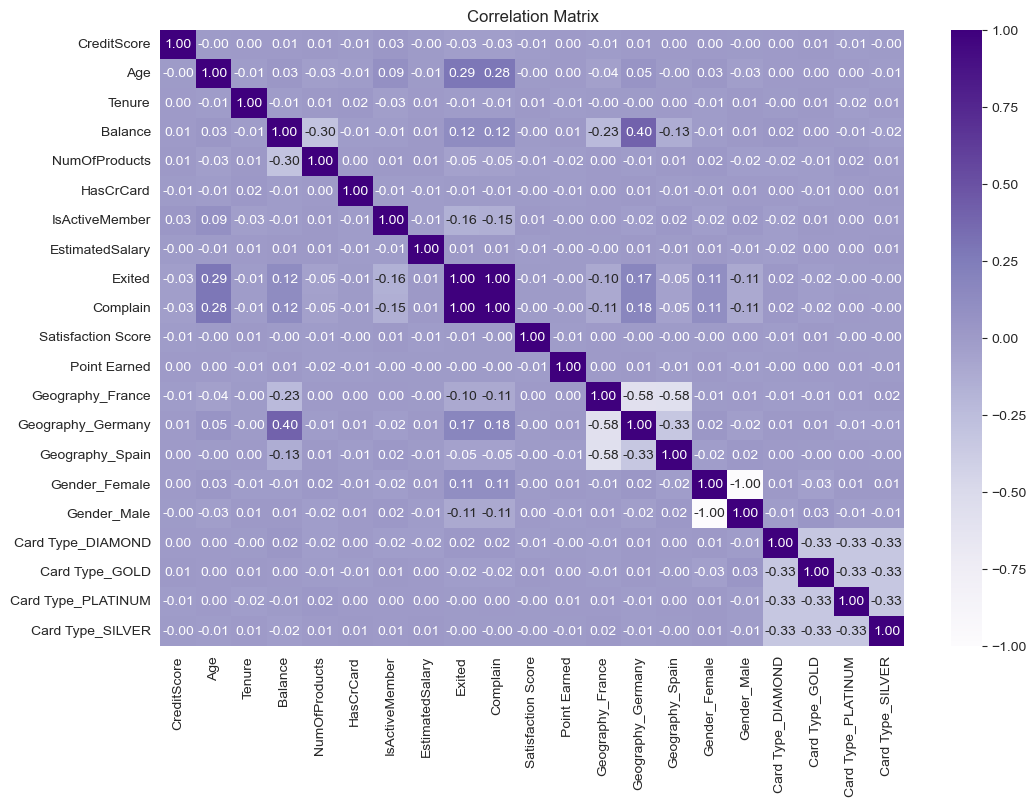

In [139]:
# Load your dataset
df = pd.read_csv('cleaned_data.csv')

# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [140]:
#list(plt.colormaps)

This heat map of the correlation matrix, which is a graphical representation of the correlation coefficients between each pair of variables in the data set, reveals interesting information that we can take into account in future decisions or analysis:
   - The **diagonal** line shows a **perfect correlation** of 1 because any variable is perfectly correlated with itself.
   - The **intensity** of the color represents the **strength** of the correlation: darker colors indicate a stronger positive relationship between each pair, conversely lighter colors denote a strong negative correlation; these correspond respectively to values closer to 1, and -1.
   - Values around 0 indicate no correlation.

Findings:
   - Blocks of variables with a perfect correlation of 1 are given, suggesting that they may be dummy variables resulting from one-step coding of a categorical variable: `Gender_Female`, and `Gender_Male`, for example.
   - Some variables, such as `Geography_Germany` and `Balance`, show a moderate positive correlation, suggesting that customers from Germany might have higher balances on average.
   - The target variable (`Exited`) might show some correlations with other characteristics: variables that have a higher correlation with the target variable are **good candidates** for inclusion in a **predictive model**; from this heat map, one would look for patterns or relationships strong enough to warrant further analysis or inclusion in a machine learning model for tasks such as churn prediction. 

In [141]:
very_strong_features = {}
strong_features = {}
moderate_features = {}
weak_features = {}
very_weak_features = {}
for variable, value in correlation_matrix['Exited'].items():
    if variable != 'Exited':
        if abs(value) >= 0.8 and abs(value) <= 1:
            very_strong_features[variable] = value
        elif abs(value) >= 0.6 and abs(value) < 0.8:
            strong_features[variable] = value
        elif abs(value) >= 0.4 and abs(value) < 0.6:
            moderate_features[variable] = value
        elif abs(value) >= 0.2 and abs(value) < 0.4:
            weak_features[variable] = value
        else:
            very_weak_features[variable] = value

map_features_ranges = {}   

# Sort the features by absolute value of the correlation coefficient, in descending order
very_strong_features = dict(sorted(very_strong_features.items(), key=lambda item: item[1], reverse=True))
strong_features = dict(sorted(strong_features.items(), key=lambda item: item[1], reverse=True))
moderate_features = dict(sorted(moderate_features.items(), key=lambda item: item[1], reverse=True))
weak_features = dict(sorted(weak_features.items(), key=lambda item: item[1], reverse=True))
very_weak_features = dict(sorted(very_weak_features.items(), key=lambda item: item[1], reverse=True))

# Update the map_features_ranges dictionary with the sorted values
map_features_ranges["Very Strong Correlation Features"] = very_strong_features
map_features_ranges["Strong Correlation Features"] = strong_features
map_features_ranges["Moderate Correlation Features"] = moderate_features
map_features_ranges["Weak Correlation Features"] = weak_features
map_features_ranges["Very Weak Correlation Features"] = very_weak_features

In [142]:
for interval, rel_features in map_features_ranges.items():
    print(interval)
    for item, values in rel_features.items():
        print("\t-", item, ":", values)
    print()

Very Strong Correlation Features
	- Complain : 0.9956925015718898

Strong Correlation Features

Moderate Correlation Features

Weak Correlation Features
	- Age : 0.2852964638406676

Very Weak Correlation Features
	- Geography_Germany : 0.17331252300665725
	- Balance : 0.11857690046280438
	- Gender_Female : 0.10626653301252896
	- Card Type_DIAMOND : 0.020089061971800107
	- EstimatedSalary : 0.012489719907641132
	- Card Type_PLATINUM : -0.00027594420411206137
	- Card Type_SILVER : -0.0038344805451633575
	- Point Earned : -0.004628173124983718
	- Satisfaction Score : -0.0058491986486141215
	- HasCrCard : -0.006976070976576932
	- Tenure : -0.013655799112819524
	- Card Type_GOLD : -0.01599532034931633
	- CreditScore : -0.02677144805527218
	- NumOfProducts : -0.047610614149474366
	- Geography_Spain : -0.052799593080398194
	- Geography_France : -0.10468843754460759
	- Gender_Male : -0.10626653301252884
	- IsActiveMember : -0.15635563349849313



The code segments features based on their correlation with the target variable `Exited`, categorizing them into five groups:

1. **Very Strong Correlation Features**: Variables with a very strong correlation with `Exited` (0.8-1 correlation coefficient - both included); they are considered highly relevant for predicting the target variable.
   - The only resulted feature was `Complain`.

2. **Strong Correlation Features**: Variables with a strong correlation with `Exited` (0.6-0.8 correlation coefficient - only lower-bound included); they are also important but slightly less so than the very strong features.
   - No features fall into this category.

3. **Moderate Correlation Features**: Variables that have a moderate correlation with `Exited` (0.4-0.6 correlation coefficient - only lower-bound included); these may still be relevant for the predictive model.
   - No features fall into this category.

4. **Weak Correlation Features**: Variables with a weak positive correlation with `Exited` (0.2-0.4 correlation coefficient - only lower-bound included); they might be of some interest but are not as correlated as the stronger features.
   - The only resulted feature was `Age`.

5. **Very Weak Correlation Features**: Variables that have a very weak correlation with `Exited` (0-0.2 correlation coefficient - only lower-bound included); while they are the least correlated, they could potentially offer some predictive value, especially in conjunction with other features.
   - Examples include `Balance`, or `IsActiveMember`.

This categorization helps in understanding the relationship between each feature and the likelihood of a customer exiting. Such insights can be critical when selecting features for a predictive model, especially for tasks such as churn prediction, by including those that have the most significant impact on the target variable.

<i>It should be noted that, from the results obtained, we found correlations, among the weakest, with a higher correlation index, but these refer to geographic areas or genders, so a priori we will omit them in our features selection.

In [143]:
from scipy.stats import ttest_ind

var_names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain',
       'Satisfaction Score',  'Point Earned']
# 'Geography',       'Gender', 'Card Type',

df2 = pd.DataFrame({'Variable': var_names})

results = []

for var in var_names:
    churned = data_cleaned[data_cleaned['Exited'] == 1][var]
    stayed = data_cleaned[data_cleaned['Exited'] == 0][var]
    
    t_statistic, p_value = ttest_ind(churned, stayed)
    
    alpha = 0.05 
    
    if p_value < alpha:
        result = 'SigDiff'
    else:
        result = 'No SigDiff'
    
    results.append(result)

df2['T-test'] = results

print(df2)

              Variable      T-test
0          CreditScore     SigDiff
1                  Age     SigDiff
2               Tenure  No SigDiff
3              Balance     SigDiff
4        NumOfProducts     SigDiff
5            HasCrCard  No SigDiff
6       IsActiveMember     SigDiff
7      EstimatedSalary  No SigDiff
8             Complain     SigDiff
9   Satisfaction Score  No SigDiff
10        Point Earned  No SigDiff


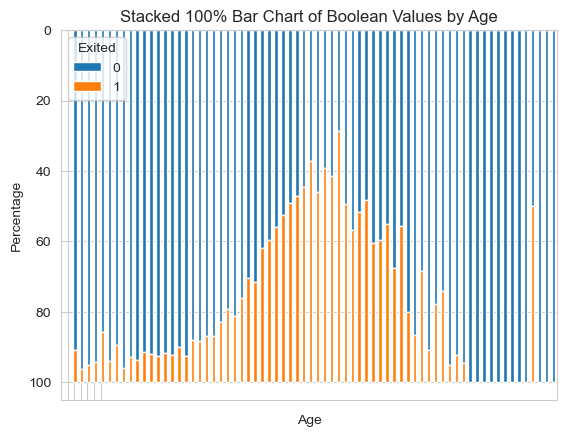

In [144]:
groupby_df = data_cleaned[['Age','Tenure','Exited']]

df_percentage = groupby_df.groupby('Age')['Exited'].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots()
ax.invert_yaxis()

df_percentage.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
ax.set_title('Stacked 100% Bar Chart of Boolean Values by Age')

# Set x-axis label intervals (e.g., every 1 year)
ax.set_xticks(df_percentage.index[0::10])
ax.set_xticks(df_percentage.index[0::10])
# ax.set_xticklabels(df_percentage.index[::10])


plt.show()

A **confusion matrix** is a table used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known; a special kind of **contingency table**, with two dimensions: "actual" and "predicted", where each one has a number of categories that represent the number of instances in each category.

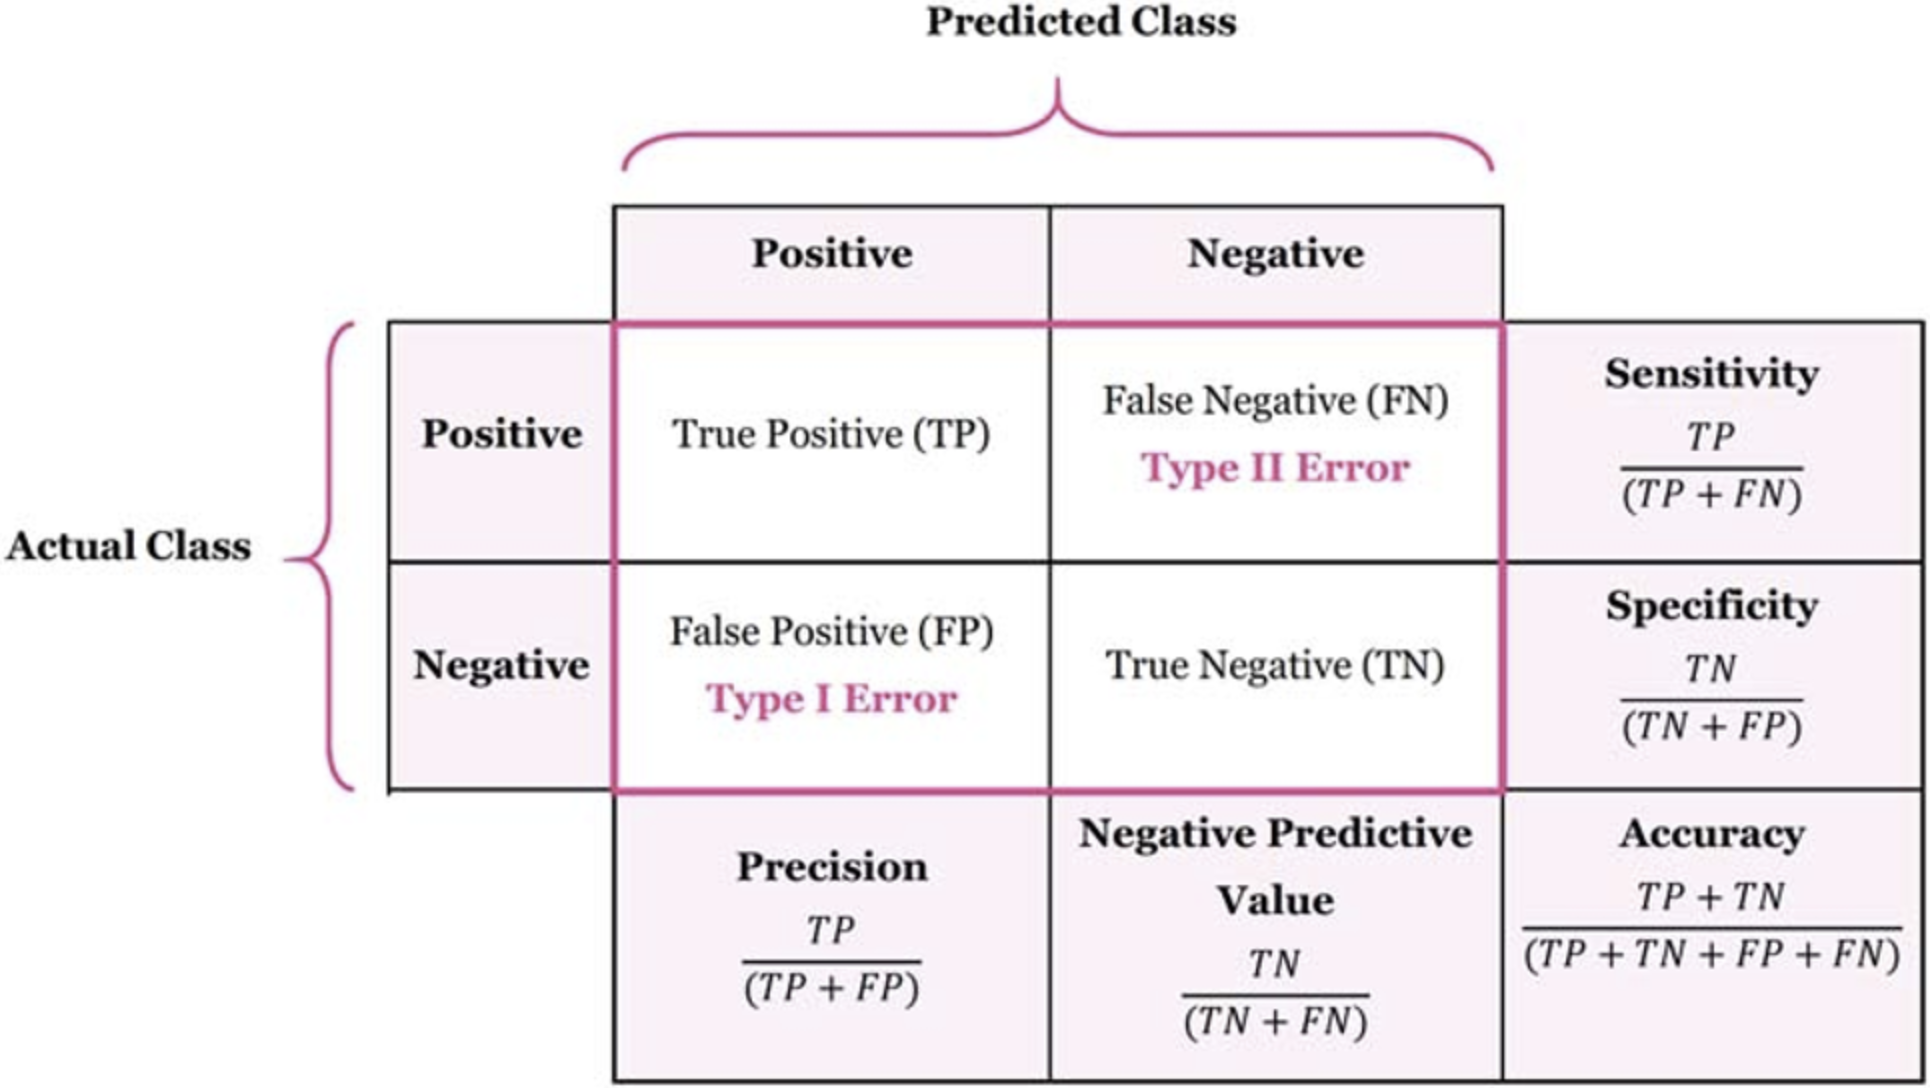

- **True Positive (TP)**: the model **correctly** predicted the **positive class**.
- **True Negative (TN)**: the model **correctly** predicted the **negative class**.
- **False Positive (FP)**: the model **incorrectly** predicted the **positive class** (Type I error).
- **False Negative (FN)**: the model **incorrectly** predicted the **negative class** (Type II error).

Derived metrics from the confusion matrix:

1. **Accuracy**: proportion of **correct predictions** (both true positives and true negatives) among the total number of cases examined.
   - Formula: $$\frac{TP + TN}{TP + TN + FP + FN}$$<br>

2. **Precision** (or **Positive Predictive Value**): proportion of **true positives** among all positive predictions. 
    - It answers the question: <i>"When the model predicts positive, how often is it correct?"</i>
    - Formula: $$\frac{TP}{TP + FP}$$<br>

3. **Recall** (or **Sensitivity**, or **True Positive Rate**): proportion of **true positives** among **all actual positives**. 
    - It answers the question: <i>"Of all the actual positives, how many did we correctly identify?"</i>
    - Formula: $$\frac{TP}{TP + FN}$$<br>

4. **F1 Score**: harmonic mean of precision and recall, F1 takes both false positives and false negatives into account; particularly useful when the class distribution is uneven/unbalanced.
   - Formula: $$ 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$<br>

5. **Specificity** (or **True Negative Rate**): proportion of **true negatives** among **all actual negatives**. It is the complement of recall, focusing on the negative class.
   - Formula: $$ \frac{TN}{TN + FP} $$<br>

6. **Error Rate**: proportion of **all incorrect predictions** among the **total number of cases**.
   - Formula: $$ \frac{FP + FN}{TP + TN + FP + FN} $$<br>

7. **ROC Curve and AUC**: A receiver operating characteristic (ROC) curve is a **graphical plot** that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied; the area under the curve (AUC) provides a single measure of **overall performance** of the classifier and ranges from 0 to 1.

In [145]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Separate features and target
X = df[['Complain','Age', 'Balance', 'IsActiveMember']]  # Features
y = df['Exited']  # Target

# Encoding categorical variables (if not already done)
# If 'IsActiveMember' is not already encoded as binary and is categorical, encode it using get_dummies
#X = pd.get_dummies(X, columns=['IsActiveMember'])

# Feature scaling
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1607
        True       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [146]:
# Separate features and target
X = df[['Complain','Age', 'Balance', 'IsActiveMember']]  # Features
y = df['Exited']  # Target

# Encoding categorical variables (if not already done)
# If 'IsActiveMember' is not already encoded as binary and is categorical, encode it using get_dummies
#X = pd.get_dummies(X, columns=['IsActiveMember'])

# Feature scaling
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = GradientBoostingClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1607
        True       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [147]:
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy" : results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean()*100,
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean()*100,
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean()*100,
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean()*100,
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean()*100,
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()*100
              }

In [148]:
cross_validation(classifier, X, y, 5)

{'Training Accuracy scores': array([0.999875, 0.999625, 0.999375, 0.999625, 0.99975 ]),
 'Mean Training Accuracy': 99.96499999999999,
 'Training Precision scores': array([0.99938688, 0.99816289, 0.9969419 , 0.99816401, 0.99877526]),
 'Mean Training Precision': 99.82861881141082,
 'Training Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Recall': 100.0,
 'Training F1 scores': array([0.99969335, 0.9990806 , 0.99846861, 0.99908116, 0.99938725]),
 'Mean Training F1 Score': 99.91421942933323,
 'Validation Accuracy scores': array([0.9945, 0.9995, 1.    , 0.9995, 0.998 ]),
 'Mean Validation Accuracy': 99.83000000000001,
 'Validation Precision scores': array([0.98062954, 0.99755501, 1.        , 1.        , 0.99266504]),
 'Mean Validation Precision': 99.4169917770266,
 'Validation Recall scores': array([0.99264706, 1.        , 1.        , 0.997543  , 0.997543  ]),
 'Mean Validation Recall': 99.75466107819048,
 'Validation F1 scores': array([0.98660171, 0.99877601, 1.        , 0.998

In [149]:
#Confusion matrix
cf = confusion_matrix(y_test, y_pred)
tp = cf[0][0]
fp = cf[0][1]
fn = cf[1][0]
tn = cf[1][1]
#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
#Precision
prec = tp/(tp+fp)
#Recall/Sensitivity
recall = tp/(tp+tn)
#F1 score
f1 = 2*((prec*recall)/(prec+recall))
#Error rate = 1 - accuracy
error_rate = 1-acc
n_errors = fn+fp

#Print results
print("Confusion matrix: ")
for i in cf:
    print("\t\t", i)
print("Accuracy: %.2f%%" % (acc*100))
print("Precision: %.2f%%" % (prec*100))
print("Recall/Sensitivity: %.2f%%" % (recall*100))
print("F1-Score: %.2f%%" % (f1*100))
print("Error rate: %.2f%%" % (error_rate*100))
print("Specific number of errors: ", n_errors)

Confusion matrix: 
		 [1606    1]
		 [  1 392]
Accuracy: 99.90%
Precision: 99.94%
Recall/Sensitivity: 80.38%
F1-Score: 89.10%
Error rate: 0.10%
Specific number of errors:  2


In [151]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.90      0.88      1607
        True       0.48      0.37      0.42       393

    accuracy                           0.80      2000
   macro avg       0.67      0.64      0.65      2000
weighted avg       0.78      0.80      0.79      2000



In [152]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = GradientBoostingClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1607
        True       0.72      0.30      0.42       393

    accuracy                           0.84      2000
   macro avg       0.79      0.63      0.66      2000
weighted avg       0.83      0.84      0.81      2000



In [153]:
cross_validation(classifier, X, y, 5)

{'Training Accuracy scores': array([0.84125 , 0.84    , 0.838375, 0.83825 , 0.841625]),
 'Mean Training Accuracy': 83.98999999999998,
 'Training Precision scores': array([0.76011561, 0.74509804, 0.76043277, 0.74889217, 0.75348189]),
 'Mean Training Precision': 75.36040956523664,
 'Training Recall scores': array([0.32269939, 0.32638037, 0.30184049, 0.31085224, 0.33169834]),
 'Mean Training Recall': 31.86941655727037,
 'Training F1 scores': array([0.45305771, 0.45392491, 0.43214756, 0.43934142, 0.46062154]),
 'Mean Training F1 Score': 44.78186296709868,
 'Validation Accuracy scores': array([0.833 , 0.832 , 0.832 , 0.8445, 0.824 ]),
 'Mean Validation Accuracy': 83.31,
 'Validation Precision scores': array([0.74342105, 0.6978022 , 0.72222222, 0.76373626, 0.65536723]),
 'Mean Validation Precision': 71.6509793606136,
 'Validation Recall scores': array([0.27696078, 0.31127451, 0.28676471, 0.34152334, 0.28501229]),
 'Mean Validation Recall': 30.030712530712535,
 'Validation F1 scores': array([

In [154]:
#Confusion matrix
cf = confusion_matrix(y_test, y_pred)
tp = cf[0][0]
fp = cf[0][1]
fn = cf[1][0]
tn = cf[1][1]
#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
#Precision
prec = tp/(tp+fp)
#Recall/Sensitivity
recall = tp/(tp+tn)
#F1 score
f1 = 2*((prec*recall)/(prec+recall))
#Error rate = 1 - accuracy
error_rate = 1-acc
n_errors = fn+fp

#Print results
print("Confusion matrix: ")
for i in cf:
    print("\t\t", i)
print("Accuracy: %.2f%%" % (acc*100))
print("Precision: %.2f%%" % (prec*100))
print("Recall/Sensitivity: %.2f%%" % (recall*100))
print("F1-Score: %.2f%%" % (f1*100))
print("Error rate: %.2f%%" % (error_rate*100))
print("Specific number of errors: ", n_errors)

Confusion matrix: 
		 [1563   44]
		 [277 116]
Accuracy: 83.95%
Precision: 97.26%
Recall/Sensitivity: 93.09%
F1-Score: 95.13%
Error rate: 16.05%
Specific number of errors:  321


In [155]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'NumOfProducts']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92      1607
        True       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [156]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'NumOfProducts']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GradientBoostingClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92      1607
        True       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [157]:
cross_validation(classifier, X, y, 5)

{'Training Accuracy scores': array([0.863   , 0.86125 , 0.863875, 0.859   , 0.863375]),
 'Mean Training Accuracy': 86.20999999999998,
 'Training Precision scores': array([0.79084967, 0.79478458, 0.79180151, 0.77130529, 0.79756637]),
 'Mean Training Precision': 78.92614842998803,
 'Training Recall scores': array([0.44539877, 0.43006135, 0.45030675, 0.43838136, 0.44206009]),
 'Mean Training Recall': 44.12416636261393,
 'Training F1 scores': array([0.56985871, 0.55812102, 0.57411029, 0.55903049, 0.56883629]),
 'Mean Training F1 Score': 56.599136036009654,
 'Validation Accuracy scores': array([0.86  , 0.855 , 0.8505, 0.8655, 0.847 ]),
 'Mean Validation Accuracy': 85.56000000000002,
 'Validation Precision scores': array([0.78828829, 0.78095238, 0.72803347, 0.776     , 0.74634146]),
 'Mean Validation Precision': 76.392312109173,
 'Validation Recall scores': array([0.42892157, 0.40196078, 0.42647059, 0.47665848, 0.37592138]),
 'Mean Validation Recall': 42.19865587512646,
 'Validation F1 score

In [158]:
#Confusion matrix
cf = confusion_matrix(y_test, y_pred)
tp = cf[0][0]
fp = cf[0][1]
fn = cf[1][0]
tn = cf[1][1]
#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
#Precision
prec = tp/(tp+fp)
#Recall/Sensitivity
recall = tp/(tp+tn)
#F1 score
f1 = 2*((prec*recall)/(prec+recall))
#Error rate = 1 - accuracy
error_rate = 1-acc
n_errors = fn+fp

#Print results
print("Confusion matrix: ")
for i in cf:
    print("\t\t", i)
print("Accuracy: %.2f%%" % (acc*100))
print("Precision: %.2f%%" % (prec*100))
print("Recall/Sensitivity: %.2f%%" % (recall*100))
print("F1-Score: %.2f%%" % (f1*100))
print("Error rate: %.2f%%" % (error_rate*100))
print("Specific number of errors: ", n_errors)

Confusion matrix: 
		 [1554   53]
		 [228 165]
Accuracy: 85.95%
Precision: 96.70%
Recall/Sensitivity: 90.40%
F1-Score: 93.45%
Error rate: 14.05%
Specific number of errors:  281


In [159]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'EstimatedSalary']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1607
        True       0.71      0.29      0.41       393

    accuracy                           0.84      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



In [160]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'EstimatedSalary']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GradientBoostingClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1607
        True       0.71      0.29      0.41       393

    accuracy                           0.84      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



In [161]:
cross_validation(classifier, X, y, 5)

{'Training Accuracy scores': array([0.840625, 0.842875, 0.8405  , 0.839875, 0.842   ]),
 'Mean Training Accuracy': 84.1175,
 'Training Precision scores': array([0.7568741 , 0.7660485 , 0.76899696, 0.75811209, 0.75664336]),
 'Mean Training Precision': 76.13350018357015,
 'Training Recall scores': array([0.3208589 , 0.32944785, 0.31042945, 0.31514408, 0.33169834]),
 'Mean Training Recall': 32.151572485546524,
 'Training F1 scores': array([0.45066782, 0.46074646, 0.44230769, 0.44521438, 0.46121057]),
 'Mean Training F1 Score': 45.202938367094276,
 'Validation Accuracy scores': array([0.835 , 0.8295, 0.8325, 0.8435, 0.826 ]),
 'Mean Validation Accuracy': 83.33,
 'Validation Precision scores': array([0.75657895, 0.69590643, 0.72121212, 0.76111111, 0.66480447]),
 'Mean Validation Precision': 71.99226163427869,
 'Validation Recall scores': array([0.28186275, 0.29166667, 0.29166667, 0.33660934, 0.29238329]),
 'Mean Validation Recall': 29.88377414848003,
 'Validation F1 scores': array([0.410714

In [162]:
#Confusion matrix
cf = confusion_matrix(y_test, y_pred)
tp = cf[0][0]
fp = cf[0][1]
fn = cf[1][0]
tn = cf[1][1]
#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
#Precision
prec = tp/(tp+fp)
#Recall/Sensitivity
recall = tp/(tp+tn)
#F1 score
f1 = 2*((prec*recall)/(prec+recall))
#Error rate = 1 - accuracy
error_rate = 1-acc
n_errors = fn+fp

#Print results
print("Confusion matrix: ")
for i in cf:
    print("\t\t", i)
print("Accuracy: %.2f%%" % (acc*100))
print("Precision: %.2f%%" % (prec*100))
print("Recall/Sensitivity: %.2f%%" % (recall*100))
print("F1-Score: %.2f%%" % (f1*100))
print("Error rate: %.2f%%" % (error_rate*100))
print("Specific number of errors: ", n_errors)

Confusion matrix: 
		 [1561   46]
		 [280 113]
Accuracy: 83.70%
Precision: 97.14%
Recall/Sensitivity: 93.25%
F1-Score: 95.15%
Error rate: 16.30%
Specific number of errors:  326


In [163]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'CreditScore', 'EstimatedSalary']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1607
        True       0.71      0.28      0.41       393

    accuracy                           0.84      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



In [164]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'CreditScore', 'EstimatedSalary']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GradientBoostingClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1607
        True       0.71      0.28      0.41       393

    accuracy                           0.84      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.84      0.81      2000



In [165]:
cross_validation(classifier, X, y, 5)

{'Training Accuracy scores': array([0.842375, 0.84325 , 0.843125, 0.8405  , 0.844875]),
 'Mean Training Accuracy': 84.2825,
 'Training Precision scores': array([0.75518672, 0.76256983, 0.78366112, 0.75836972, 0.76280323]),
 'Mean Training Precision': 76.45181263692788,
 'Training Recall scores': array([0.33496933, 0.33496933, 0.31779141, 0.31943593, 0.34702636]),
 'Mean Training Recall': 33.08384708842856,
 'Training F1 scores': array([0.4640884 , 0.46547315, 0.45220428, 0.44952545, 0.47703329]),
 'Mean Training F1 Score': 46.166491306948494,
 'Validation Accuracy scores': array([0.8355, 0.83  , 0.834 , 0.8445, 0.8305]),
 'Mean Validation Accuracy': 83.49,
 'Validation Precision scores': array([0.75159236, 0.69318182, 0.72891566, 0.76966292, 0.68478261]),
 'Mean Validation Precision': 72.56270735128571,
 'Validation Recall scores': array([0.28921569, 0.29901961, 0.29656863, 0.33660934, 0.30958231]),
 'Mean Validation Recall': 30.61991135520547,
 'Validation F1 scores': array([0.4176991

In [166]:
#Confusion matrix
cf = confusion_matrix(y_test, y_pred)
tp = cf[0][0]
fp = cf[0][1]
fn = cf[1][0]
tn = cf[1][1]
#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
#Precision
prec = tp/(tp+fp)
#Recall/Sensitivity
recall = tp/(tp+tn)
#F1 score
f1 = 2*((prec*recall)/(prec+recall))
#Error rate = 1 - accuracy
error_rate = 1-acc
n_errors = fn+fp

#Print results
print("Confusion matrix: ")
for i in cf:
    print("\t\t", i)
print("Accuracy: %.2f%%" % (acc*100))
print("Precision: %.2f%%" % (prec*100))
print("Recall/Sensitivity: %.2f%%" % (recall*100))
print("F1-Score: %.2f%%" % (f1*100))
print("Error rate: %.2f%%" % (error_rate*100))
print("Specific number of errors: ", n_errors)

Confusion matrix: 
		 [1562   45]
		 [281 112]
Accuracy: 83.70%
Precision: 97.20%
Recall/Sensitivity: 93.31%
F1-Score: 95.21%
Error rate: 16.30%
Specific number of errors:  326


In [167]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'NumOfProducts', 'EstimatedSalary']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92      1607
        True       0.77      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [168]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'NumOfProducts', 'EstimatedSalary']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GradientBoostingClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92      1607
        True       0.77      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [169]:
#Confusion matrix
cf = confusion_matrix(y_test, y_pred)
tp = cf[0][0]
fp = cf[0][1]
fn = cf[1][0]
tn = cf[1][1]
#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
#Precision
prec = tp/(tp+fp)
#Recall/Sensitivity
recall = tp/(tp+tn)
#F1 score
f1 = 2*((prec*recall)/(prec+recall))
#Error rate = 1 - accuracy
error_rate = 1-acc
n_errors = fn+fp

#Print results
print("Confusion matrix: ")
for i in cf:
    print("\t\t", i)
print("Accuracy: %.2f%%" % (acc*100))
print("Precision: %.2f%%" % (prec*100))
print("Recall/Sensitivity: %.2f%%" % (recall*100))
print("F1-Score: %.2f%%" % (f1*100))
print("Error rate: %.2f%%" % (error_rate*100))
print("Specific number of errors: ", n_errors)

Confusion matrix: 
		 [1557   50]
		 [229 164]
Accuracy: 86.05%
Precision: 96.89%
Recall/Sensitivity: 90.47%
F1-Score: 93.57%
Error rate: 13.95%
Specific number of errors:  279


In [170]:
# Separate features and target
X = df[['Age', 'Balance', 'IsActiveMember', 'NumOfProducts', 'EstimatedSalary']]  # Features
y = df['Exited']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifier with a simpler model (less trees and depth)
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Use GridSearchCV to find the best parameters to prevent overfitting
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best estimator found
best_classifier = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))
print("Best parameters found: ", grid_search.best_params_)

              precision    recall  f1-score   support

       False       0.87      0.97      0.92      2416
        True       0.79      0.40      0.53       584

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000

Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [171]:
cross_validation(best_classifier, X, y, 5)

{'Training Accuracy scores': array([0.862875, 0.860875, 0.86325 , 0.86075 , 0.864375]),
 'Mean Training Accuracy': 86.2425,
 'Training Precision scores': array([0.83437892, 0.80376028, 0.82923833, 0.8227216 , 0.828125  ]),
 'Mean Training Precision': 82.36448260431108,
 'Training Recall scores': array([0.40797546, 0.4196319 , 0.41411043, 0.4040466 , 0.42244022]),
 'Mean Training Recall': 41.36409218628339,
 'Training F1 scores': array([0.54800165, 0.55139057, 0.55237316, 0.54194079, 0.55948031]),
 'Mean Training F1 Score': 55.06372946482186,
 'Validation Accuracy scores': array([0.855, 0.859, 0.854, 0.861, 0.85 ]),
 'Mean Validation Accuracy': 85.58,
 'Validation Precision scores': array([0.81052632, 0.81188119, 0.76851852, 0.79723502, 0.7715736 ]),
 'Mean Validation Precision': 79.19469299058386,
 'Validation Recall scores': array([0.37745098, 0.40196078, 0.40686275, 0.42506143, 0.37346437]),
 'Mean Validation Recall': 39.6960061665944,
 'Validation F1 scores': array([0.51505017, 0.53

In [172]:
#Confusion matrix
cf = confusion_matrix(y_test, y_pred)
tp = cf[0][0]
fp = cf[0][1]
fn = cf[1][0]
tn = cf[1][1]
#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
#Precision
prec = tp/(tp+fp)
#Recall/Sensitivity
recall = tp/(tp+tn)
#F1 score
f1 = 2*((prec*recall)/(prec+recall))
#Error rate = 1 - accuracy
error_rate = 1-acc
n_errors = fn+fp

#Print results
print("Confusion matrix: ")
for i in cf:
    print("\t\t", i)
print("Accuracy: %.2f%%" % (acc*100))
print("Precision: %.2f%%" % (prec*100))
print("Recall/Sensitivity: %.2f%%" % (recall*100))
print("F1-Score: %.2f%%" % (f1*100))
print("Error rate: %.2f%%" % (error_rate*100))
print("Specific number of errors: ", n_errors)

Confusion matrix: 
		 [2354   62]
		 [349 235]
Accuracy: 86.30%
Precision: 97.43%
Recall/Sensitivity: 90.92%
F1-Score: 94.07%
Error rate: 13.70%
Specific number of errors:  411


In [173]:
models = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Iterate over models and perform cross-validation
for model in models:
    cv_scores = cross_val_score(model, X, y, cv=7)
    print(f"{model.__class__.__name__}: Average CV Accuracy: {cv_scores.mean()}")


LogisticRegression: Average CV Accuracy: 0.8068008168977877
SVC: Average CV Accuracy: 0.855299642600217
KNeighborsClassifier: Average CV Accuracy: 0.8383002606220934
DecisionTreeClassifier: Average CV Accuracy: 0.7877994444803813
RandomForestClassifier: Average CV Accuracy: 0.8415000009800979
GradientBoostingClassifier: Average CV Accuracy: 0.8561994426882018


#### Logistic Regression

In [174]:
X = data_cleaned[[ 'Age',  'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']]  
# , 'Complain'
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2402)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [175]:
coefficients = model.coef_

print("Coefficients:", coefficients)

Coefficients: [[ 0.76053736  0.28498119 -0.02626156  0.00097058 -0.51560225]]


In [178]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cmatrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cmatrix)

Accuracy: 0.8136
Confusion Matrix:
[[1951   50]
 [ 416   83]]
